In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

In [200]:
# Loading the excel file
train= pd.read_csv('train.csv')

In [5]:
# Displaying the first 5 rows
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [7]:
# Checking the shape of the dataset(no. of rows and columns)
train.shape

(381109, 12)

The dataset has 381109 entries with 12 features

In [8]:
# Loading the test file too
test= pd.read_csv('test.csv')

In [9]:
test.head()
# This has all the columns except Response(Target variable)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [10]:
test.shape

(127037, 11)

In [201]:
# Checking the basic info about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [202]:
# Few variables are marked as numerical which are actually categorical, so we are changing their datatypes
train['Driving_License'] = train['Driving_License'].astype('object')
train['Region_Code'] = train['Region_Code'].astype('object')
train['Previously_Insured'] = train['Previously_Insured'].astype('object')
train['Policy_Sales_Channel']= train['Policy_Sales_Channel'].astype('object')
train['Response'] = train['Response'].astype('object')

In [203]:
train.info()  # Checking if the datatypes have changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 34.9+ MB


In [27]:
# Creating a new dataframe for numerical and categorical features seperately
train_num = train.select_dtypes(np.number)
train_cat = train.select_dtypes('object')

In [16]:
# Printing those features based on dtype
print('The number of numerical columns are:', len(train_num.columns),'and the columns are:', train_num.columns)
print('The number of categorical columns are:', len(train_cat.columns),'and the columns are:', train_cat.columns)

The number of numerical columns are: 4 and the columns are: Index(['id', 'Age', 'Annual_Premium', 'Vintage'], dtype='object')
The number of categorical columns are: 8 and the columns are: Index(['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


In [17]:
train.describe() # This will automatically consider only the numerical columns

,id,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,30564.389581,154.347397
std,110016.836208,15.511611,17213.155057,83.671304
min,1.000000,20.000000,2630.000000,10.000000
25%,95278.000000,25.000000,24405.000000,82.000000
50%,190555.000000,36.000000,31669.000000,154.000000
75%,285832.000000,49.000000,39400.000000,227.000000
max,381109.000000,85.000000,540165.000000,299.000000


We can see that, Age varies between 20 to 85 and the mean is 39 and the median is 36, so most of them are youngsters and middle age people. The 75% quantile is also 49, so there are very less number of old age people.

Annual Premium varies between 2630 and 540165, which is a huge difference. Also, the mean and median are different,so there are outliers in this column

In [14]:
# Checking for the number of null values
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We can see that, the dataset does not have null values

## Univariate analysis

In [18]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

### 1) Gender
#### Categorical column

In [33]:
# Checking the unique entries in the column
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

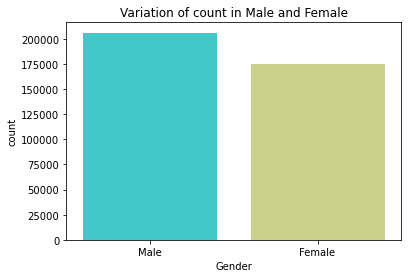

In [34]:
sns.countplot(x='Gender',data=train,palette='rainbow')
plt.title('Variation of count in Male and Female')
plt.show()

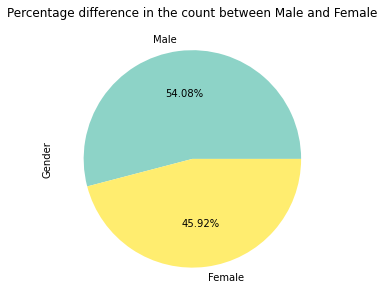

In [35]:
plt.figure(figsize=(10,5))
train['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',cmap='Set3',labels=['Male','Female'])
plt.title('Percentage difference in the count between Male and Female')
plt.show()

Thus, we see that the number of males is more than number of females.
But, moreover females do contribute almost equally, there is no significant difference in the count

### 2) Age
#### Numerical column

In [36]:
# It is a numerical column
train['Age'].nunique()

66

In [37]:
# So, the age column has 66 different entries

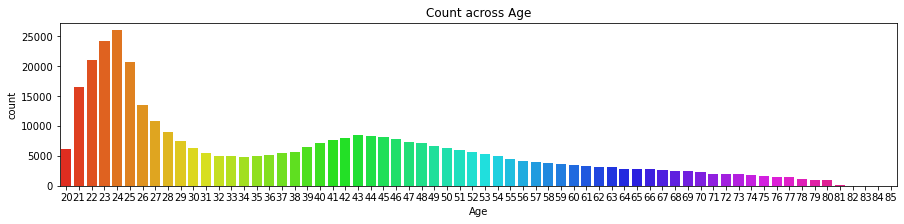

In [38]:
plt.figure(figsize = (15,3))
sns.countplot(train['Age'], palette = 'hsv')
plt.title('Count across Age')
plt.show()

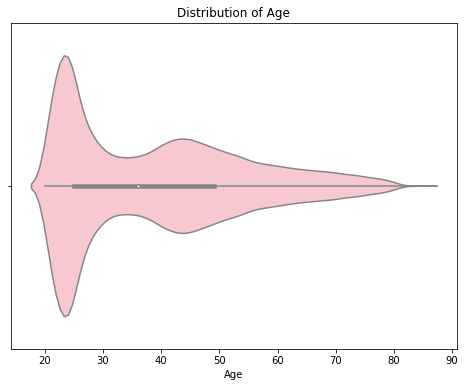

In [39]:
plt.rcParams['figure.figsize'] = 8,6
sns.violinplot(train['Age'],color='Pink')
plt.title('Distribution of Age')
plt.show()

We can see that, there are more number of people in the age between 20 and 30 and the graph gradually decreases.
So, our target customers should mostly be youngsters and we could also see a small peak between 40 and 50.
So, middle age people should be our next priority.

### 3) Driving License
#### It is a categorical column

In [40]:
# It is a categorical column
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

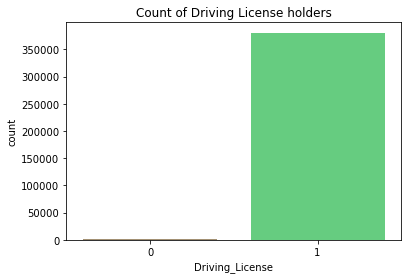

In [41]:
plt.rcParams['figure.figsize'] = 6,4
sns.countplot(x='Driving_License',data=train,palette='terrain_r')
plt.title('Count of Driving License holders')
plt.show()

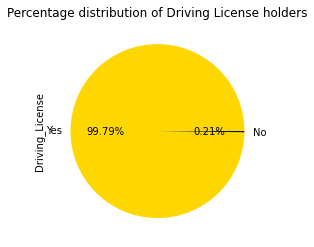

In [42]:
train['Driving_License'].value_counts().plot(kind='pie',autopct='%.2f%%',
                                             labels=['Yes','No'],colors=['Gold','Black'])
plt.title('Percentage distribution of Driving License holders')
plt.show()

We can see that, only very less number of people (0.21 %) does not possess a Driving license.
We understand that, it will not be a problem to sell vehicle insurance to our policyholders, since almost all of them posses a driving license

### 4) Region code
#### It is a categorical column

In [43]:
# It is a numerical column
train['Region_Code'].nunique()

21

We see that, there are 53 unique regions

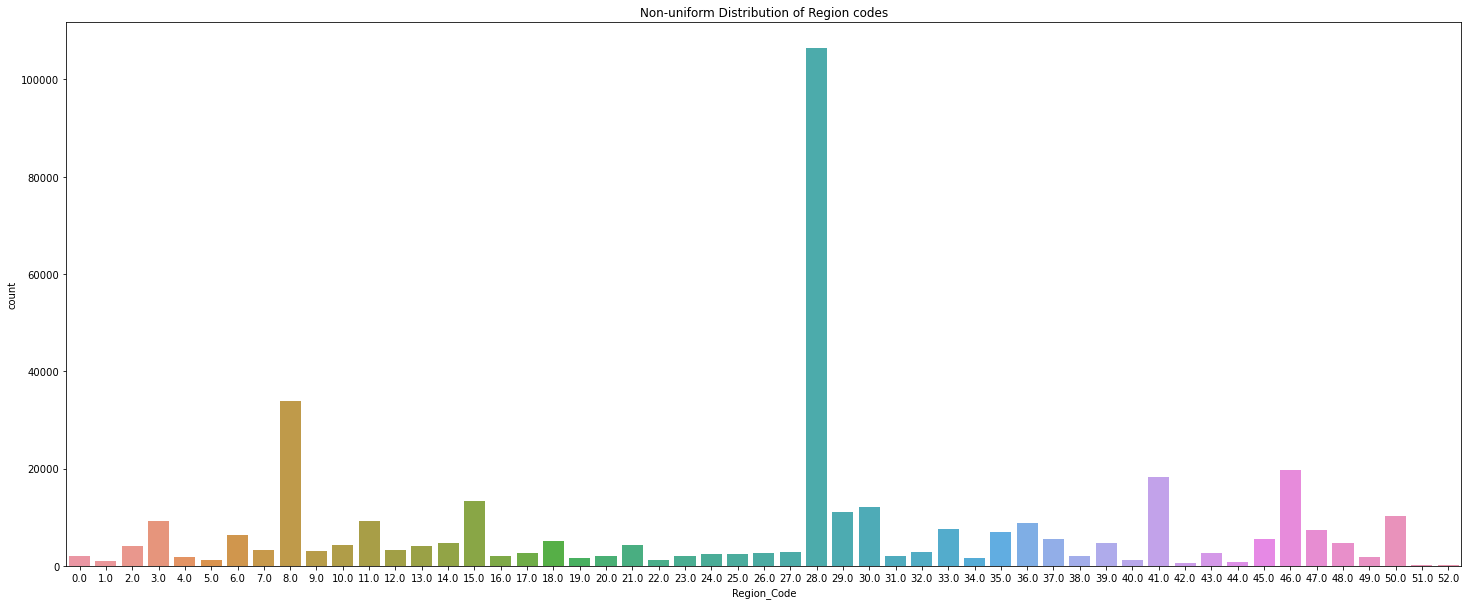

In [53]:
plt.rcParams['figure.figsize']= 25,10
sns.countplot(train['Region_Code'])
plt.title('Non-uniform Distribution of Region codes')
plt.show()

In [24]:
train['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
23.0      1960
31.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

We can also see that, the top 20 region codes itself contribute to 80% of the data.
So, grouping the rest of the regions as 'Other Regions'

In [28]:
train['Region_Code'] = train['Region_Code'].apply(lambda x: 'Other Region'
                                                  if x in (39,10,21,2,13,7,12,9,27,32,43,17,26,25,24,38,0,16,23,31,20,49,4,34,19,22,40,44,5,1,42,52,51)
                                                  else x)

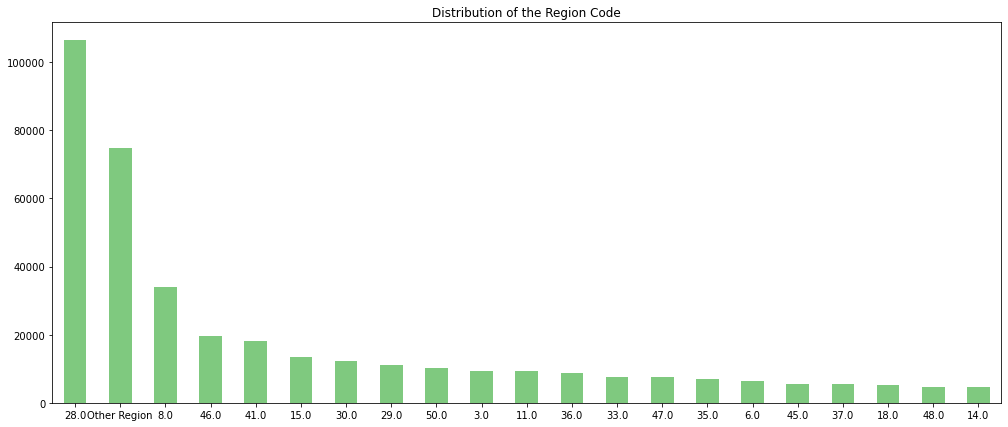

In [55]:
plt.figure(figsize=(17,7))
train['Region_Code'].value_counts().plot(kind='bar',cmap='Accent',rot=0)
plt.title('Distribution of the Region Code')
plt.show()

### 5) Previously Insured

#### It is a categorical column

In [28]:
# It is a categorical column
train['Previously_Insured'].value_counts()
# 1 : Customer already has Vehicle Insurance: Not yet expired, has insurance from other company
# 0 : Customer doesn't have Vehicle Insurance: yet to renew or expired


0    206481
1    174628
Name: Previously_Insured, dtype: int64

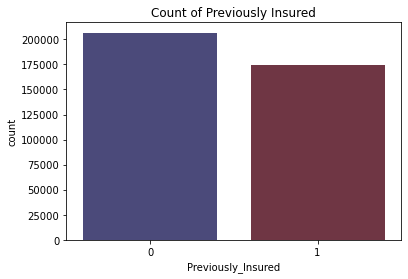

In [57]:
plt.rcParams['figure.figsize'] = 6,4
sns.countplot(x='Previously_Insured',data=train,palette='icefire')
plt.title('Count of Previously Insured')
plt.show()

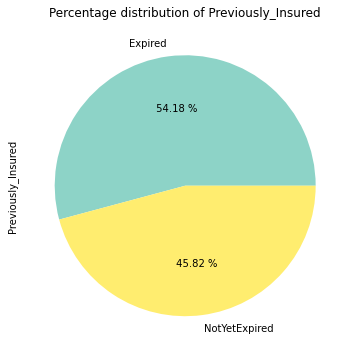

In [58]:
plt.rcParams['figure.figsize']= 8,6
train['Previously_Insured'].value_counts().plot(kind='pie',autopct='% .2f %%', cmap='Set3', labels=['Expired','NotYetExpired'])
plt.title('Percentage distribution of Previously_Insured')
plt.show()

We can see that, more than 50% of the policyholders does not already have a vehicle insurance.
This will be an advantage to cross-sell vehicle insurance.

### 6) Vehicle Age
#### It is a categorical column

In [31]:
# It is a categorical column
# Checking different values in the column
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

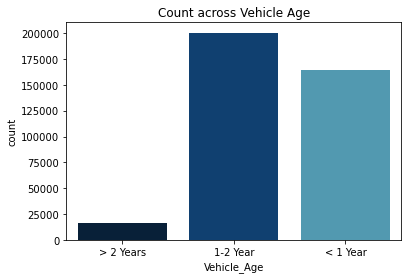

In [32]:
sns.countplot(train['Vehicle_Age'],palette='ocean')
plt.title('Count across Vehicle Age')
plt.show()

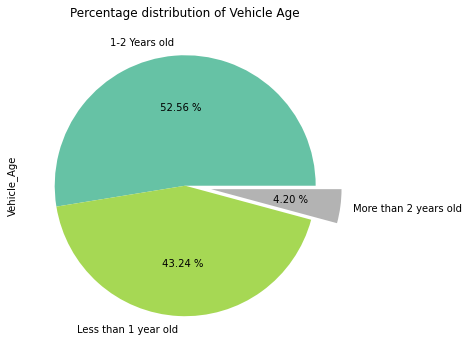

In [438]:
plt.figure(figsize=(10,6))
train['Vehicle_Age'].value_counts().plot(kind='pie',autopct='% .2f %%',
                                         labels=['1-2 Years old','Less than 1 year old','More than 2 years old'],
                                        explode=[0,0,0.2],cmap='Set2')
plt.title('Percentage distribution of Vehicle Age')
plt.show()

We see that, most of the customers' vehicle is new.

So, this will be an advantage to make them subscribe to this companies vehicle insurance

### 7) Vehicle Damage
#### It is a categorical column

In [34]:
# Seeing the different values in the column
train['Vehicle_Damage'].value_counts()
# 1 : Customer got his/her vehicle damaged in the past.
# 0 : Customer didn't get his/her vehicle damaged in the past.

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

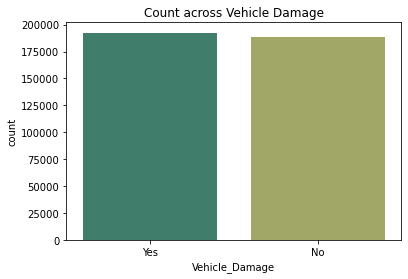

In [35]:
sns.countplot(train['Vehicle_Damage'],palette='gist_earth')
plt.title('Count across Vehicle Damage')
plt.show()

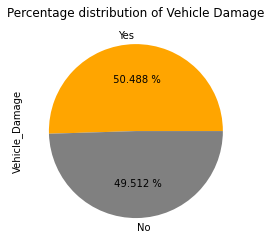

In [36]:
train['Vehicle_Damage'].value_counts().plot(kind='pie',autopct='% .3f %%',labels=['Yes','No'],
                                            colors=['Orange','Gray'])
plt.title('Percentage distribution of Vehicle Damage')
plt.show()

The proportion of yes and no in this case is almost equal.

But, we can see that 50% of our customers have damaged their vehicle in the past, so this should be taken as advantage for cross-selling.

### 8) Annual Premium
#### It is a numerical column

In [37]:
train['Annual_Premium'].nunique()
# Checking for the different entries in the column

48838

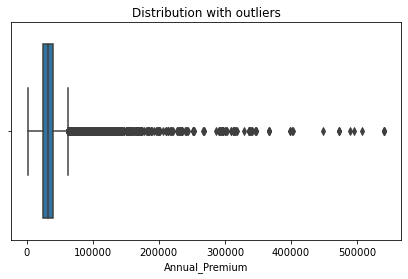

In [38]:
plt.rcParams['figure.figsize'] = 7,4
sns.boxplot(train['Annual_Premium'])
plt.title('Distribution with outliers')
plt.show()

We see that there are more number of outliers in this column.

Many people are paying high premium value

### 9) Policy sales channel
#### It is a categorical column

In [39]:
# Checking the number of unique values in the column
train['Policy_Sales_Channel'].nunique()

155

In [40]:
# We see that there are 155 different policy sales channel

In [42]:
train['Policy_Sales_Channel'].value_counts()
# Checking the different values in the column

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
123.0         1
143.0         1
149.0         1
84.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

We can see that, the top 5 channels contribute more than 80% of the data.
So, we can group the other channels as 'Other_Sales_Channel'

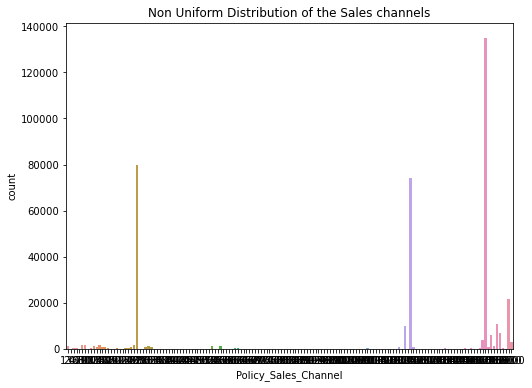

In [59]:
sns.countplot(train['Policy_Sales_Channel'])
plt.title('Non Uniform Distribution of the Sales channels')
plt.show()

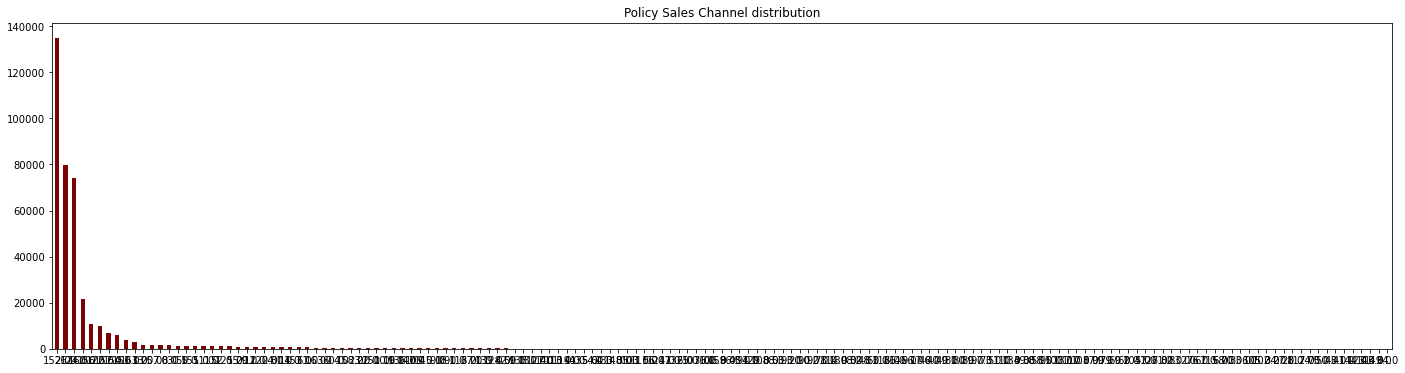

In [64]:
plt.figure(figsize=(24,6))
train['Policy_Sales_Channel'].value_counts().plot(kind='bar',rot=0,cmap='turbo_r')
plt.title('Policy Sales Channel distribution')
plt.show()

In [29]:
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].apply(lambda x: 'Other_sales_channels'
                                                  if x not in (152,26,124,160,156)
                                                  else x)

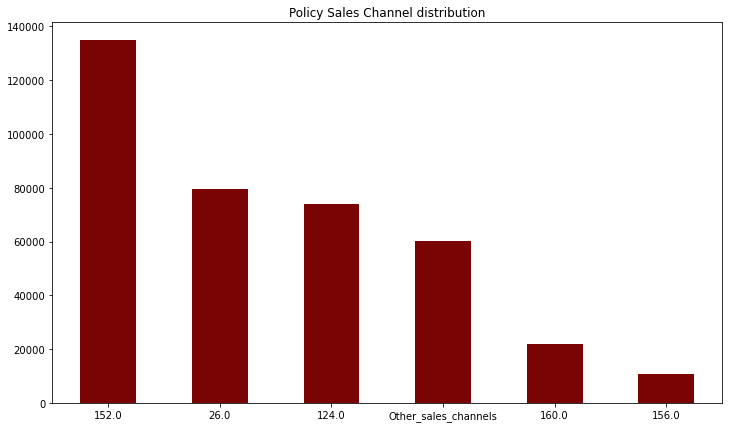

In [66]:
plt.figure(figsize=(12,7))
train['Policy_Sales_Channel'].value_counts().plot(kind='bar',rot=0,cmap='turbo_r')
plt.title('Policy Sales Channel distribution')
plt.show()

We can see that the channels near 150 are making more sales

### 10) Vintage
#### Numerical column

In [45]:
train['Vintage'].nunique()

290

In [46]:
# We see that there are 290 different entries in this column

In [47]:
train['Vintage'].max()

299

In [48]:
train['Vintage'].min()

10

In [49]:
round(train['Vintage'].mean(),2)

154.35

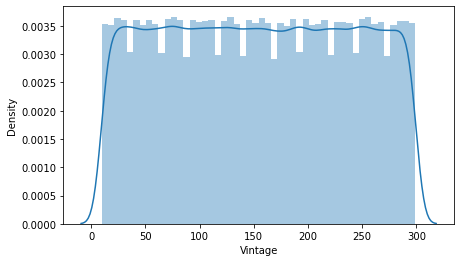

In [50]:
sns.distplot(train['Vintage'])
plt.show()

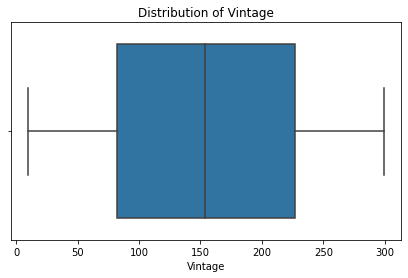

In [51]:
sns.boxplot(train['Vintage'])
plt.title('Distribution of Vintage')
plt.show()

There is no specific distribution in the vintage column.
But, we can see that there are many entries with more than the mean, so there are chances for making loyal customers to subscribe

### 11) Response
#### Categorical column

In [52]:
# Checking the unique entries of this column
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

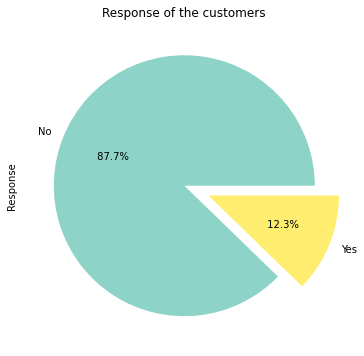

In [494]:
plt.rcParams['figure.figsize'] = 6,6
train['Response'].value_counts().plot(kind='pie',autopct='% .1f%%',cmap='Set3',explode=[0,0.2]
                                     ,labels=['No','Yes'])
plt.title('Response of the customers')
plt.show()

We can see that, the conversion rate is very low. Only 12.3% of the existing customers have agreed to get a vehicle insurance from this company.
The main goal is to increase this conversion rates.

## Bivariate Analysis

#### 1) Gender with Reponse

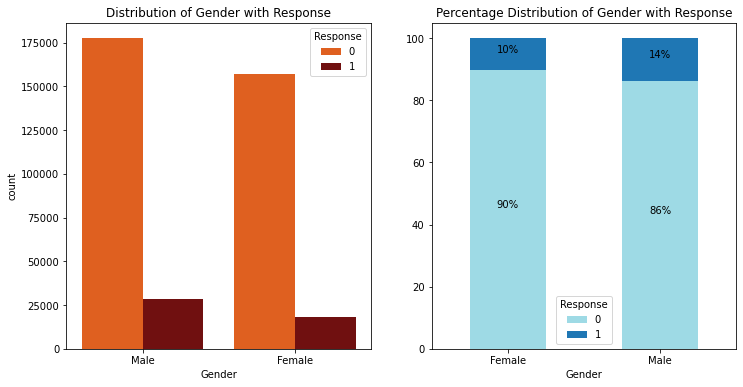

In [67]:
plt.rcParams['figure.figsize'] = 12,6
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Gender'],hue=train['Response'],palette='gist_heat_r',ax=ax[0]))
plt.title('Distribution of Gender with Response')
ax1= pd.crosstab(train['Gender'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='tab20_r',ax=ax[1]))
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.title('Percentage Distribution of Gender with Response')
plt.show()

We can see that, very less percentage of male and females have agreed to subscribe.

#### 2) Age with Response

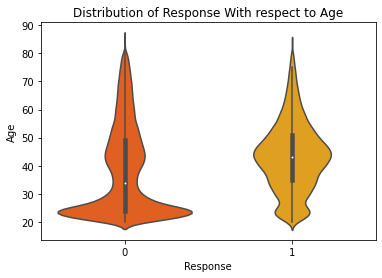

In [68]:
plt.rcParams['figure.figsize'] = 6,4
sns.violinplot(train['Response'],train['Age'],palette='autumn')
plt.title('Distribution of Response With respect to Age')
plt.show()

We see that, there is a slight peak between 40 and 50.
So, middle age people can be focused on.

#### 3) Driving License with Response

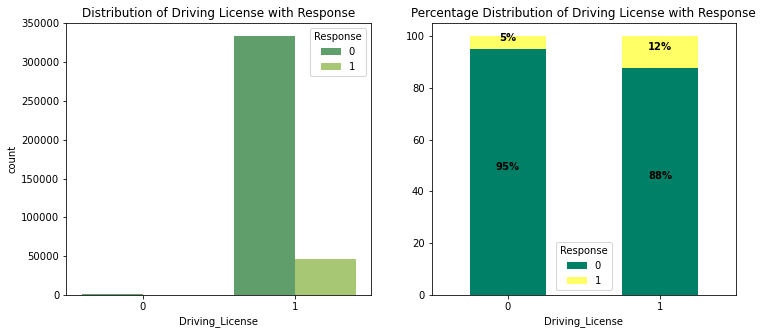

In [69]:
plt.rcParams['figure.figsize']= 12,5
fig, ax= plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Driving_License'],hue=train['Response'],ax=ax[0],palette='summer'))
plt.title('Distribution of Driving License with Response')
ax1= pd.crosstab(train['Driving_License'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='summer',ax=ax[1]))
plt.title('Percentage Distribution of Driving License with Response')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              weight='bold',
              ha='center', 
              va='bottom')
plt.show()
plt.show()

#### 3) Region code with Response

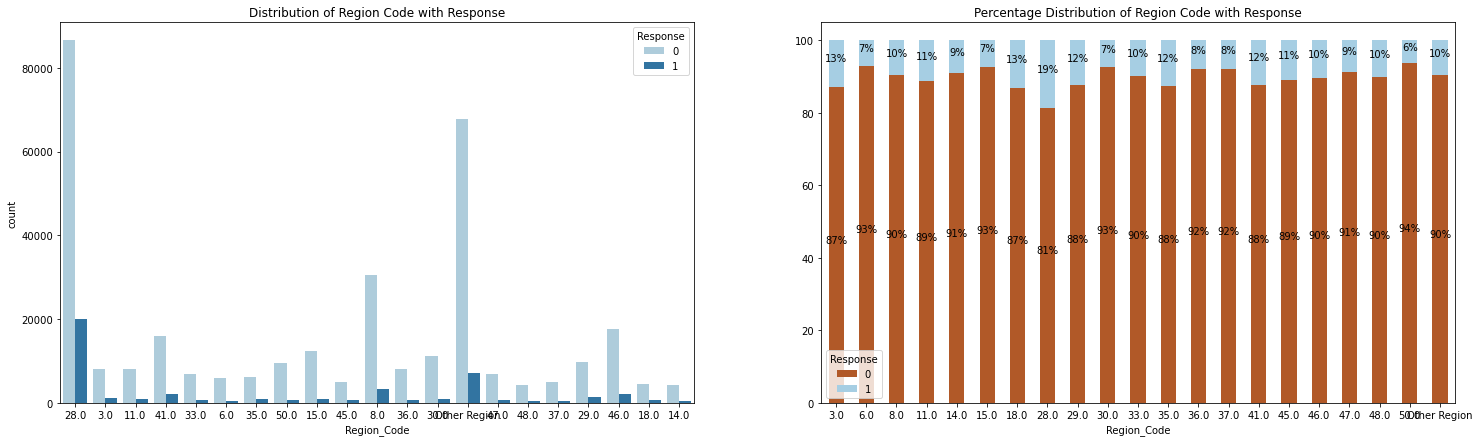

In [70]:
plt.rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Region_Code'],hue=train['Response'],ax=ax[0],palette='Paired'))
plt.title('Distribution of Region Code with Response')
ax1= pd.crosstab(train['Region_Code'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='Paired_r',ax=ax[1]))
plt.title('Percentage Distribution of Region Code with Response')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

More number of people have agreed to subscribe from the region code near 30.
So, people from those region can be focused more.

In [30]:
# Based on the response, we can classify them further as
train['Region_Code'] = train['Region_Code'].apply(lambda x: 'Medium_resp_Region'
                                                  if x in (8,11,14,33,45,46,47,48)
                                                  else x)
train['Region_Code'] = train['Region_Code'].apply(lambda x: 'High_resp_Region'
                                                  if x in (3,18,28,29,35,41)
                                                  else x)
train['Region_Code'] = train['Region_Code'].apply(lambda x: 'low_resp_Region'
                                                  if x in (6,15,30,36,37,50,'Other Region')
                                                  else x)

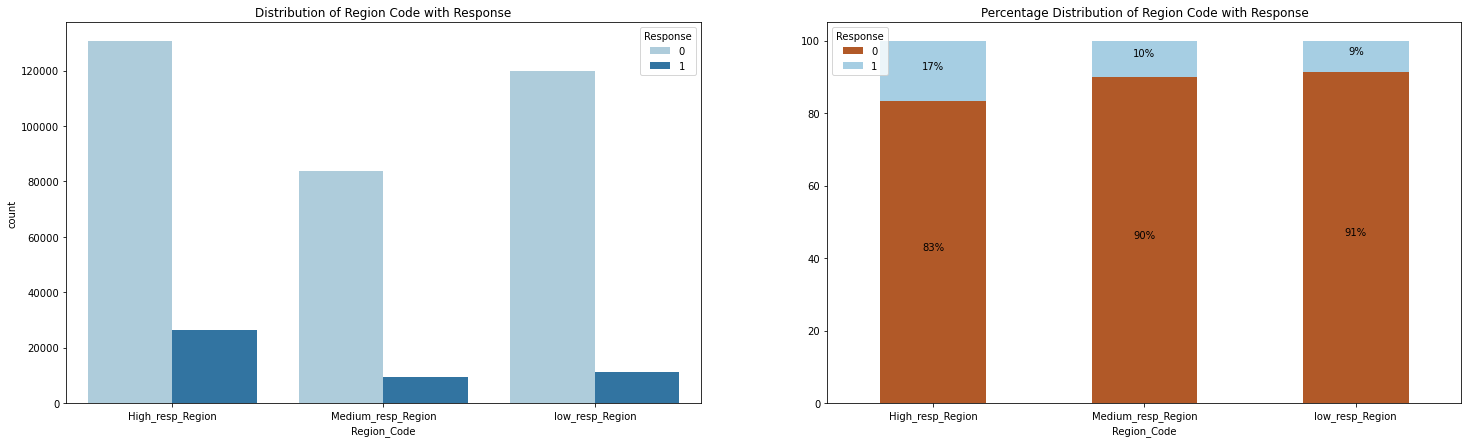

In [72]:
plt.rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Region_Code'],hue=train['Response'],ax=ax[0],palette='Paired'))
plt.title('Distribution of Region Code with Response')
ax1= pd.crosstab(train['Region_Code'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='Paired_r',ax=ax[1]))
plt.title('Percentage Distribution of Region Code with Response')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

#### 4) Previously Insured with Response

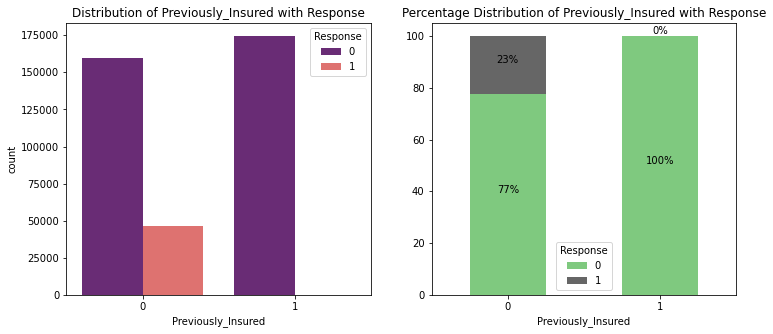

In [73]:
plt.rcParams['figure.figsize'] = 12,5
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Previously_Insured'],hue=train['Response'],palette='magma',ax=ax[0]))
plt.title('Distribution of Previously_Insured with Response')
ax1= pd.crosstab(train['Previously_Insured'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='Accent',ax=ax[1]))
plt.title('Percentage Distribution of Previously_Insured with Response')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

Those who had insurance already were not interested in subscribing here.
So, we should focus more on the people who does not have vehicle insurance yet.

#### 5) Vehicle Age with Response

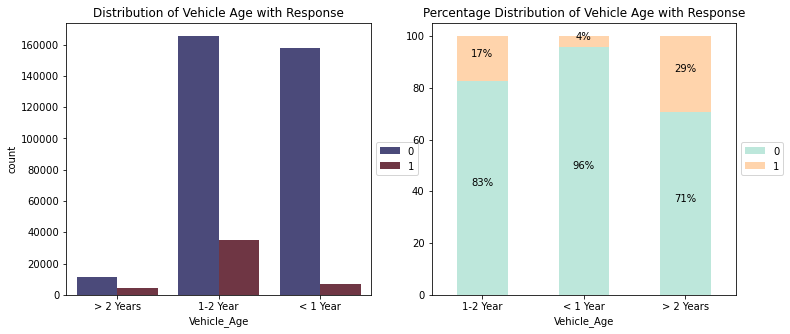

In [74]:
plt.rcParams['figure.figsize'] = 12,5
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Vehicle_Age'],hue=train['Response'],palette='icefire',ax=ax[0]))
plt.title('Distribution of Vehicle Age with Response')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1= pd.crosstab(train['Vehicle_Age'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='icefire',ax=ax[1]))
plt.title('Percentage Distribution of Vehicle Age with Response')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

Even those with vehicles less than 1 year old has not agreed to subscribe.
Vehicles with 1-2 years shows some promise, but subscription for vehicles greater than 2 years is also less.

#### 6) Vehicle Damage with Response

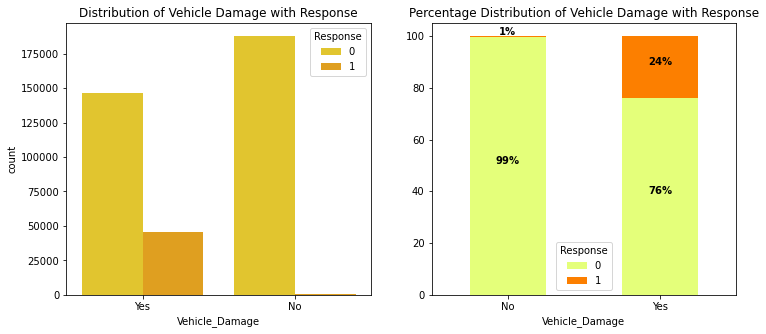

In [75]:
plt.rcParams['figure.figsize'] = 12,5
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(sns.countplot(train['Vehicle_Damage'],hue=train['Response'],palette='Wistia',ax=ax[0]))
plt.title('Distribution of Vehicle Damage with Response')
ax1= pd.crosstab(train['Vehicle_Damage'],train['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='Wistia',ax=ax[1]))
plt.title('Percentage Distribution of Vehicle Damage with Response')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              weight= 'bold',
              ha='center', 
              va='bottom',)
plt.show()

It is clear that, those who did not damage their vehicles in the past are not interested in getting vehicle insurance.

#### 7) Annual Premium with Response

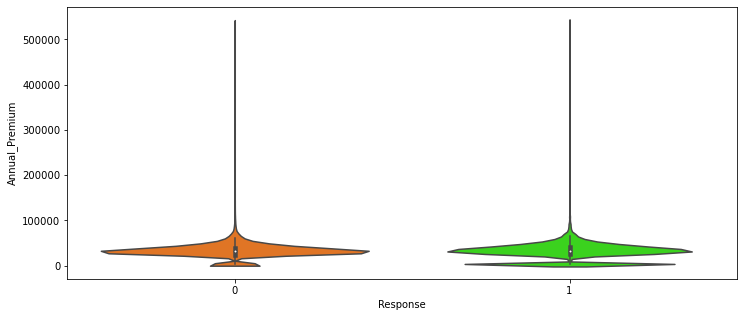

In [76]:
sns.violinplot(train['Response'],train['Annual_Premium'],palette='gist_ncar_r')
plt.show()

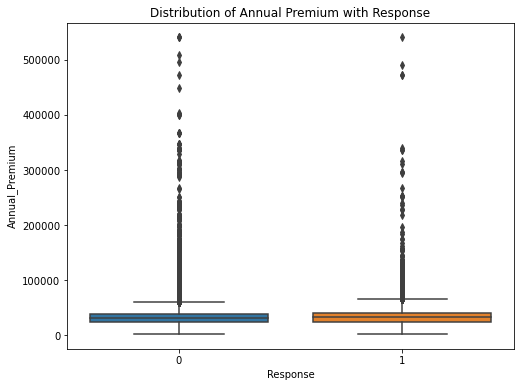

In [279]:
plt.rcParams['figure.figsize']=8,6
sns.boxplot(train['Response'],train['Annual_Premium'])
plt.title('Distribution of Annual Premium with Response')
plt.show()

#### 8) Policy Sales channel with Response

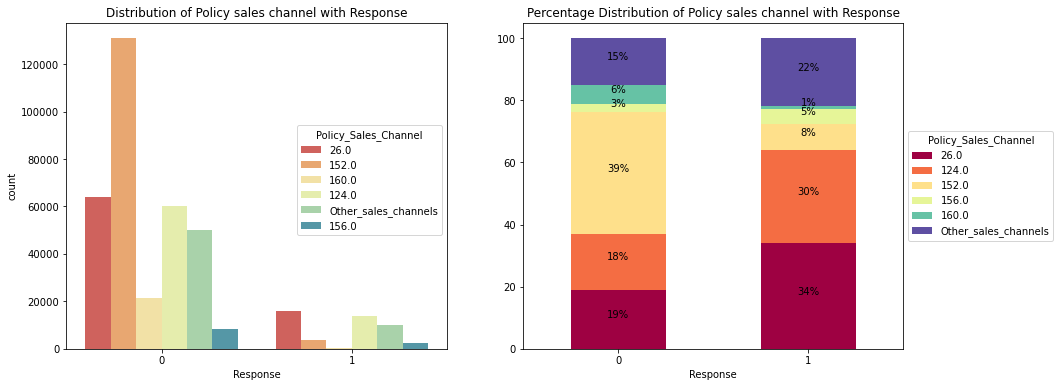

In [69]:
plt.rcParams['figure.figsize']= 15,6
fig, ax= plt.subplots(nrows=1,ncols=2)
plt.subplot(sns.countplot(train['Response'],hue=train['Policy_Sales_Channel'],ax=ax[0],palette='Spectral'))
plt.title('Distribution of Policy sales channel with Response')
ax1= pd.crosstab(train['Response'],train['Policy_Sales_Channel']).apply(lambda r: r/r.sum()*100, axis=1)
plt.legend(title='Policy_Sales_Channel', bbox_to_anchor=(1, 0.7))
ax_1= plt.subplot(ax1.plot(kind='bar',stacked=True,rot=0,cmap='Spectral',ax=ax[1]))
plt.title('Percentage Distribution of Policy sales channel with Response')
plt.legend(title='Policy_Sales_Channel',loc='center left', bbox_to_anchor=(1, 0.5))
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

#### 9) Vintage With Response

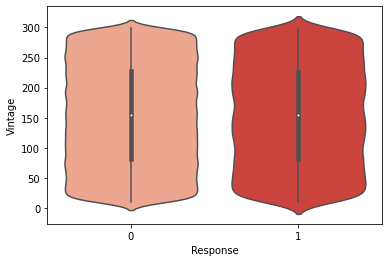

In [141]:
sns.violinplot(train['Response'],train['Vintage'],palette='Reds')
plt.show()

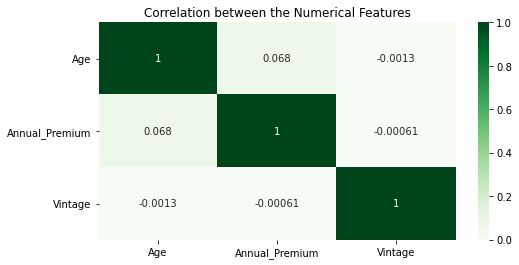

In [71]:
plt.figure(figsize=(8,4))
t= train[['Age','Annual_Premium','Vintage']]
sns.heatmap(t.corr(),cmap='Greens',annot=True)
plt.title('Correlation between the Numerical Features')
plt.show()

## Hypothesis Testing

### 1) Gender with Response

#### Null Hypothesis: Gender has no effect on Response

#### Alternative Hypothesis: Gender has an effect on Response

In [77]:
CT1= pd.crosstab(train['Response'],train['Gender'])
CT1

Gender,Female,Male
Response,,
0,156835,177564
1,18185,28525


In [78]:
from scipy.stats import chi2_contingency
chi2_contingency(CT1)

(1047.7077577887574,
 7.665800628415621e-230,
 1,
 array([[153568.9605336, 180830.0394664],
        [ 21451.0394664,  25258.9605336]]))

In [79]:
# Here, the pvalue(7.665800628415621e-230) is less than alpha(0.05). So, we reject the null hypothesis.
# So, we conclude that, Gender has an effect on Response

### 2) Age with Response

#### Null Hypothesis: Age has no effect on Response
#### Alternate Hypothesis: Age has an effect on Response

In [18]:
import scipy.stats as st
st.ttest_ind(train['Age'],train['Response'])

Ttest_indResult(statistic=1539.8621899232285, pvalue=0.0)

In [81]:
# The pvalue 0 is less than alpha. So, we reject null hypothesis.
## So, Age has an effect on Response

### 3) Driving License with Response

#### Null Hypothesis: Driving License has no effect on Response
#### Alternate Hypothesis: Driving License has an effect on Response

In [82]:
CT2= pd.crosstab(train['Driving_License'],train['Response'])
CT2

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


In [83]:
from scipy.stats import chi2_contingency
chi2_contingency(CT2)

(38.63411722321234,
 5.111753504019177e-10,
 1,
 array([[7.12478551e+02, 9.95214492e+01],
        [3.33686521e+05, 4.66104786e+04]]))

In [84]:
# We can see that, the pvalue is less than alpha. So, we reject the null hypothesis
# So, Driving License has an effect on Response

### 4) Region code with Response
#### Null hypothesis: Region code does not have an effect on Response
#### Alternate Hypothesis: Region code has an effect on Response

In [85]:
CT3= pd.crosstab(train['Region_Code'],train['Response'])
CT3

Response,0,1
Region_Code,,
3.0,8070,1181
6.0,5841,439
8.0,30620,3257
11.0,8191,1041
14.0,4256,422
15.0,12350,958
18.0,4475,678
28.0,86498,19917
29.0,9700,1365


In [86]:
chi2_contingency(CT3)

(6472.164732977479,
 0.0,
 20,
 array([[ 8117.16634611,  1133.83365389],
        [ 5510.30209205,   769.69790795],
        [29724.92101472,  4152.07898528],
        [ 8100.49504997,  1131.50495003],
        [ 4104.6485966 ,   573.3514034 ],
        [11676.92678997,  1631.07321003],
        [ 4521.43100006,   631.56899994],
        [93372.41992448, 13042.58007552],
        [ 9708.83640901,  1356.16359099],
        [10696.83006436,  1494.16993564],
        [ 6715.90003385,   938.09996615],
        [ 6091.16514698,   850.83485302],
        [ 7718.81011207,  1078.18988793],
        [ 4826.77895038,   674.22104962],
        [16024.62533553,  2238.37466447],
        [ 4918.03236082,   686.96763918],
        [17328.49618088,  2420.50381912],
        [ 6524.61884658,   911.38115342],
        [ 4107.28090651,   573.71909349],
        [ 8987.58349186,  1255.41650814],
        [65621.7313472 ,  9166.2686528 ]]))

In [87]:
# The pvalue is less than alpha, so we reject the null hypothesis.
# So, Region code has an effect on Response

### 5) Previously Insured with Response
#### Null Hypothesis: Previously Insured does not have an effect on Response
#### Alternate Hypothesis : Previously Insured has an effect on Response

In [88]:
CT4= pd.crosstab(train['Previously_Insured'],train['Response'])
CT4

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


In [89]:
chi2_contingency(CT4)

(44357.96472219977,
 0.0,
 1,
 array([[181173.99462883,  25307.00537117],
        [153225.00537117,  21402.99462883]]))

In [90]:
# Here, the pvalue is less than alpha. So, we reject the null hypothesis
# So, Previously Insured has an impact on Response

### 6) Vehicle Age with Response
#### Null Hypothesis: Vehicle age does not have effect on Response
#### Alternate Hypothesis: Vehicle age has an effect on Response

In [91]:
CT5= pd.crosstab(train['Vehicle_Age'],train['Response'])
CT5

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


In [92]:
chi2_contingency(CT5)

(18771.889904151052,
 0.0,
 2,
 array([[175764.59775025,  24551.40224975],
        [144589.27397149,  20196.72602851],
        [ 14045.12827826,   1961.87172174]]))

In [93]:
# Here, the pvalue is less than alpha, so we reject null hypothesis.
# So, vehicle age has an effect on Response

### 7) Vehicle Damage with Response
#### Null hypothesis: Vehicle damage does not have an effect on Response
#### Alternate Hypothesis: Vehicle damage has an effect on Response

In [94]:
CT6= pd.crosstab(train['Vehicle_Damage'],train['Response'])
CT6

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


In [95]:
chi2_contingency(CT6)

(47864.76180117493,
 0.0,
 1,
 array([[165568.78400668,  23127.21599332],
        [168830.21599332,  23582.78400668]]))

In [96]:
# Here, the pvalue is less than alpha, so we reject null hypothesis
# So, vehicle damage has an effect on Response

### 8) Annual Premium with Response
#### Null Hypothesis: Annual Premium does not have an effect on Response
#### Alternate Hypothesis: Annual Premium has an effect on Response

In [97]:
g1= train[train['Response']==0]['Annual_Premium']
g2= train[train['Response']==1]['Annual_Premium']
from scipy.stats import shapiro
print(shapiro(g1))
print(shapiro(g2))

ShapiroResult(statistic=0.8771548271179199, pvalue=0.0)
ShapiroResult(statistic=0.8508264422416687, pvalue=0.0)


In [98]:
# As p_values of both groups are less than 0.05, the data is skewed.

# As, data is skewed, we need to perform non-parametric independent two-sample t-test

In [99]:
from scipy.stats import mannwhitneyu

In [100]:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=7343668645.5, pvalue=4.570648777804621e-98)

In [101]:
# Here, since pvalue is less than alpha, we reject the null hypothesis
# So, Annual premium has an effect on Response

### 9) Policy sales channel with Response
#### Null Hypothesis: Policy sales channel does not have an effect on Response
#### Alternate Hypothesis: Policy sales channel has an effect on Response

In [102]:
CT7= pd.crosstab(train['Policy_Sales_Channel'],train['Response'])
CT7

Response,0,1
Policy_Sales_Channel,,
26.0,63809,15891
124.0,59999,13996
152.0,130926,3858
156.0,8364,2297
160.0,21304,475
Other_sales_channels,49997,10193


In [103]:
chi2_contingency(CT7)

(22620.658412283592,
 0.0,
 5,
 array([[ 69931.70011729,   9768.29988271],
        [ 64925.92409258,   9069.07590742],
        [118264.41993236,  16519.58006764],
        [  9354.35200691,   1306.64799309],
        [ 19109.69255777,   2669.30744223],
        [ 52812.91129309,   7377.08870691]]))

### 10) Vintage with Response
#### Null Hypothesis: Vintage does not have an effect on Response
#### Alternate Hypothesis: Vintage has an effect on Response

In [261]:
train.skew()

id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model= ols('Vintage ~ Response', data=train).fit()
anova_table= sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Response,1.0,2.943658e+03,2943.658399,0.420469,0.516704
Residual,381107.0,2.668091e+09,7000.897696,NaN,NaN


In [105]:
# Here, the pvalue is greater than alpha, so we fail to reject null hypothesis
# So, we conclude that, vintage does not have an effect on Response

### Outlier Treatment

In [97]:
train_new = train.copy()

In [98]:
Q1= train_new.quantile(0.25)
Q2= train_new.quantile(0.5)
Q3= train_new.quantile(0.75)
IQR= Q3- Q1
print(IQR)
LL= Q1- 1.5 * IQR
UL= Q3+ 1.5 * IQR


id                190554.0
Age                   24.0
Annual_Premium     14995.0
Vintage              145.0
dtype: float64


In [99]:
train_new = train_new[~((train_new < LL ) |(train_new > UL))]

In [101]:
train_new['Annual_Premium'].max() , train['Annual_Premium'].max()

(61892.0, 540165.0)

In [305]:
train[(train['Annual_Premium'] > 61892) & (train['Response']==1)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
401,1,65,1,20,0,1,90789.0,4,1,0,0
484,0,36,1,19,0,1,63198.0,4,1,0,0
616,1,46,1,20,0,1,64819.0,3,1,0,1
1007,1,23,1,20,0,1,65040.0,4,1,1,0
1079,1,71,1,20,0,1,67477.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
379423,1,63,1,20,0,1,94121.0,0,1,0,1
379806,0,51,1,20,0,1,77800.0,3,1,0,0
379815,0,73,1,17,0,1,76864.0,1,1,0,0
380605,0,53,1,20,0,1,67320.0,4,1,0,0


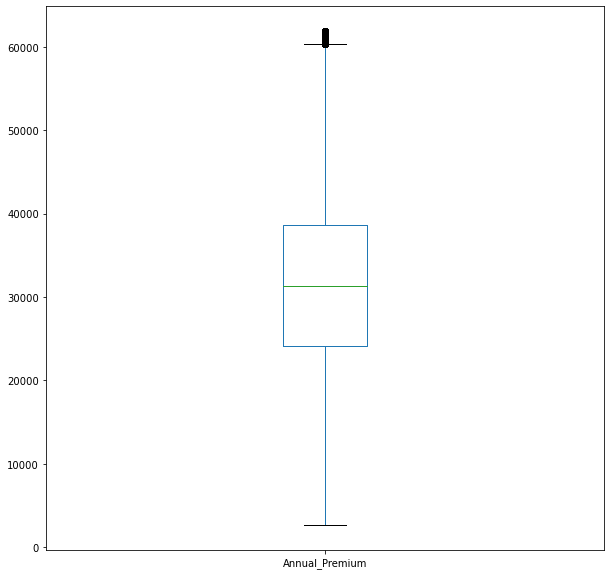

In [102]:
plt.figure(figsize=(10,10))
train_new['Annual_Premium'].plot(kind='box')
plt.show()

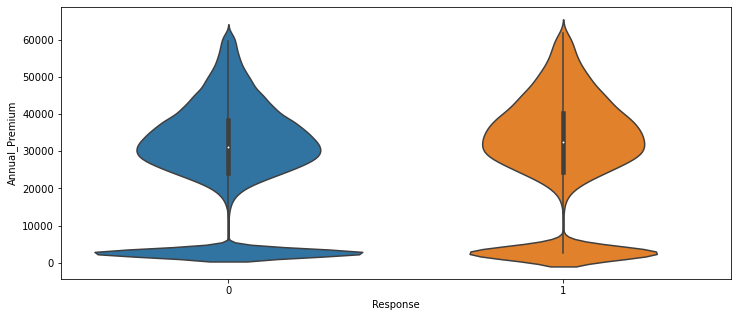

In [103]:
sns.violinplot(train_new['Response'],train_new['Annual_Premium'])
plt.show()

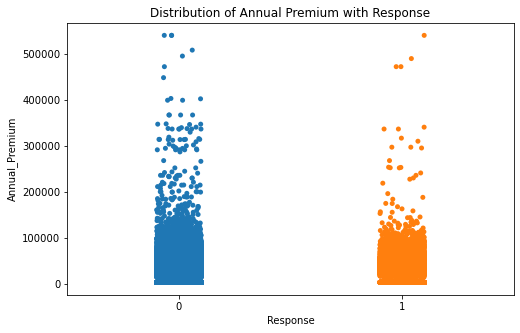

In [116]:
plt.rcParams['figure.figsize']=8,5
sns.stripplot(train['Response'],train['Annual_Premium'])
plt.title('Distribution of Annual Premium with Response')
plt.show()

In [119]:
mean= train['Annual_Premium'].mean()
mean

30564.389581458323

In [120]:
train['Annual_Premium'].max()

540165.0

In [121]:
std= train['Annual_Premium'].std()

In [122]:
# Using Z-Score

threshold = 3
outlier = []
for i in train['Annual_Premium']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', len(outlier))

outlier in dataset is 2083


In [81]:
train_num.skew()

id                9.443274e-16
Age               6.725390e-01
Annual_Premium    1.766087e+00
Vintage           3.029517e-03
dtype: float64

In [31]:
train_num.drop('id',axis=1,inplace=True)

In [32]:
from sklearn.preprocessing import PowerTransformer
for i in train.select_dtypes(np.number):
    pt = PowerTransformer()
    train[i] = pt.fit_transform(train[[i]])

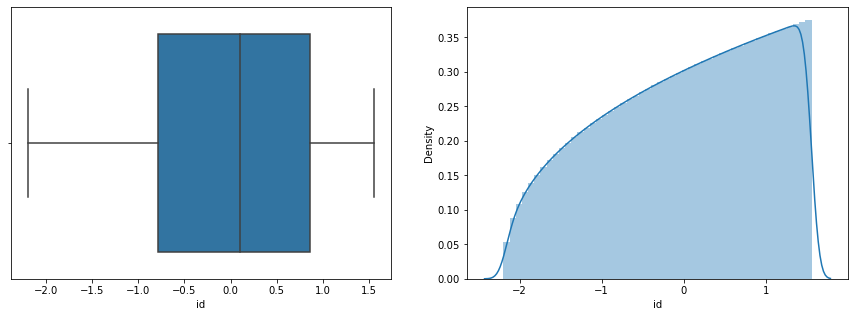

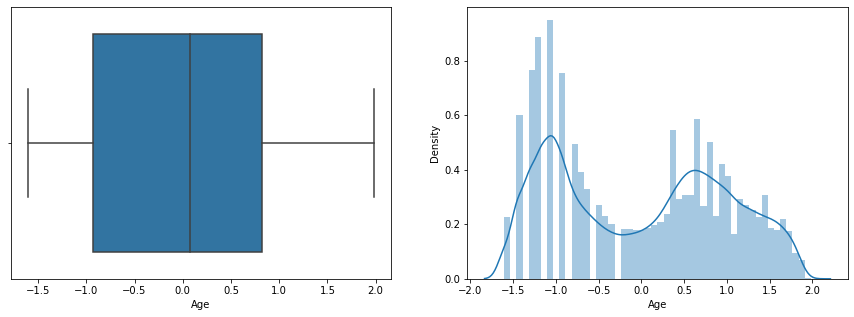

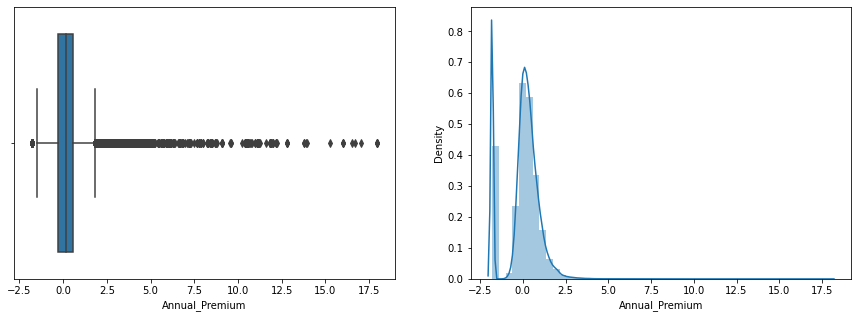

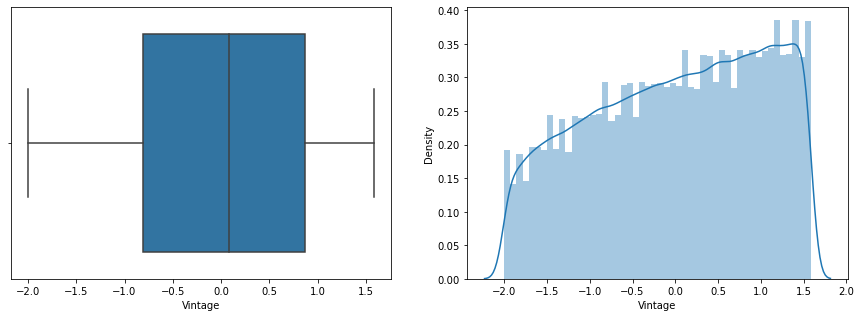

In [33]:
for i in train.select_dtypes(np.number):
    fig , ax = plt.subplots(1,2,figsize=(15,5))
    sns.boxplot(train[i] , ax=ax[0])
    sns.distplot(train[i] , ax=ax[1])
    plt.show()

In [104]:
train_num['Annual_Premium'].mean() , train['Annual_Premium'].mean()

(-7.608049662154124e-16, 30564.389581458323)

In [105]:
train_num['Age'].mean() , train['Age'].mean()

(1.0102351054300924e-15, 38.822583565331705)

In [107]:
train_num.skew() 

Age               0.065385
Annual_Premium    0.083221
Vintage          -0.224251
dtype: float64

### Feature Engineering

In [123]:
train['id'].nunique()
# Checking for duplicates in the id column

381109

We can see that number of rows and number of unique entries in id column are same.
So, there are no duplicates in this column

In [34]:
train=train.drop('id',axis=1)

In [346]:
# As we saw from hypothesis testing that the vintage column is not having an effect on the Response column,we drop that
train= train.drop('Vintage',axis=1)

In [35]:
train['Gender']= train['Gender'].map({'Female':0,'Male':1})

In [36]:
train['Vehicle_Damage']= train['Vehicle_Damage'].map({'No':0,'Yes':1})

In [189]:
train['Policy_Sales_Channel'].value_counts()

152.0                   134784
26.0                     79700
124.0                    73995
Other_sales_channels     60190
160.0                    21779
156.0                    10661
Name: Policy_Sales_Channel, dtype: int64

In [37]:
train['Policy_Sales_Channel']= train['Policy_Sales_Channel'].map({'Other_sales_channels':0,156:1,160:2,124:3
                                                                  ,26:4,152:5})

In [191]:
train['Region_Code'].value_counts()

28.0            106415
Other Region     74788
8.0              33877
46.0             19749
41.0             18263
15.0             13308
30.0             12191
29.0             11065
50.0             10243
3.0               9251
11.0              9232
36.0              8797
33.0              7654
47.0              7436
35.0              6942
6.0               6280
45.0              5605
37.0              5501
18.0              5153
48.0              4681
14.0              4678
Name: Region_Code, dtype: int64

In [38]:
train['Region_Code']= train['Region_Code'].map({'low_resp_Region':0,'Medium_resp_Region':1,'High_resp_Region':2})

### Model Building

In [50]:
# Seperating the independent and dependent variable
y= train['Response']
y = y.astype('int')
x= train.drop('Response',axis=1)
X= pd.get_dummies(x,drop_first=True)

In [51]:
# Renaming the columns with symbols
X= X.rename(columns={'Vehicle_Age_< 1 Year':'New_vehicles','Vehicle_Age_> 2 Years':'Old_vehicles'})

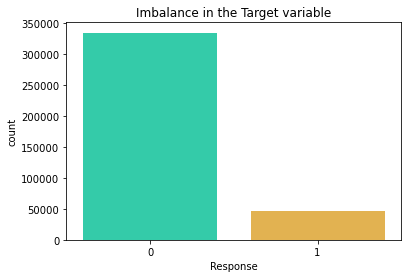

In [52]:
# Checking the imbalance in the target variable
plt.rcParams['figure.figsize'] = 6,4
sns.countplot(y,palette='turbo')
plt.title('Imbalance in the Target variable')
plt.show()

In [53]:
 # Seperating them into train and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size= 0.7, random_state=42)

In [54]:
# Checking the shape of train and test
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((266776, 11), (114333, 11), (266776,), (114333,))

## Models before balancing

### Decision Tree 

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [253]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score, f1_score
dt= DecisionTreeClassifier()
dt= dt.fit(xtrain,ytrain)
y_pred_dt = dt.predict(xtest)
print(classification_report(ytest, y_pred_dt))
print('Training Accuracy', dt.score(xtrain,ytrain),'\tTesting Accuracy', dt.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,dt.predict(xtrain)),'\tTesting Precision',precision_score(ytest,y_pred_dt))
print('Training Recall', recall_score(ytrain,dt.predict(xtrain)),'\tTesting Recall',recall_score(ytest,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    100195
           1       0.31      0.26      0.28     14138

    accuracy                           0.84    114333
   macro avg       0.60      0.59      0.59    114333
weighted avg       0.82      0.84      0.83    114333

Training Accuracy 0.9787949440729301 	Testing Accuracy 0.8352094320974697
Training Precision 0.989523844167182 	Testing Precision 0.3051619852514707
Training Recall 0.8351651725408327 	Testing Recall 0.2605036072994766


In [323]:
# We can see that our model is not performing well on class 1 and also it is overfitting

In [324]:
# Finding the best parameters using Radomized Search
from sklearn.model_selection import RandomizedSearchCV
g= {'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 20),
                     'min_samples_split': range(2,10)}
gs= RandomizedSearchCV(DecisionTreeClassifier(),
                      param_distributions=g,
                      n_iter=10,
                      scoring=precision_score,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Decision Tree Classifier:  {'min_samples_split': 6, 'max_depth': 15, 'criterion': 'gini'} 



In [240]:
# Checking the performance of the tuned models
from sklearn.metrics import classification_report, accuracy_score
dt_t= DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=6)
dt_t= dt_t.fit(xtrain,ytrain)
y_pred_dt_t = dt_t.predict(xtest)
print('Tuned Decision Tree model:\n')
print(classification_report(ytest, y_pred_dt_t))
print('Training Accuracy: ', round(dt_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(dt_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain, dt_t.predict(xtrain)),4),'\tTesting Precision:',round(precision_score(ytest,y_pred_dt_t),4))
print('Training Recall:   ', round(recall_score(ytrain,dt_t.predict(xtrain)),4),'\tTesting Recall:   ',round(recall_score(ytest,y_pred_dt_t),4))

Tuned Decision Tree model:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93    100195
           1       0.31      0.03      0.05     14138

    accuracy                           0.87    114333
   macro avg       0.60      0.51      0.49    114333
weighted avg       0.81      0.87      0.82    114333

Training Accuracy:  0.8831 	Testing Accuracy:  0.872
Training Precision: 0.7296 	Testing Precision: 0.3139
Training Recall:    0.0678 	Testing Recall:    0.0297


AUC 0.874442094634672


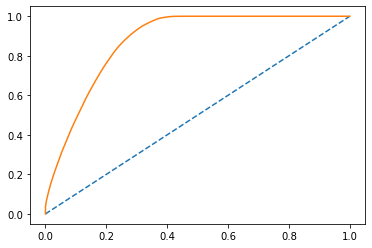

In [208]:
y_prob_tr1 = dt_t.predict_proba(xtrain)[:,1]
auc_tr1 = roc_auc_score(ytrain, y_prob_tr1)
fpr_tr1,tpr_tr1, thr_tr1 = roc_curve(ytrain,y_prob_tr1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tr, tpr_tr)
print('AUC',auc_tr1)
plt.show()

AUC 0.8345180166464333


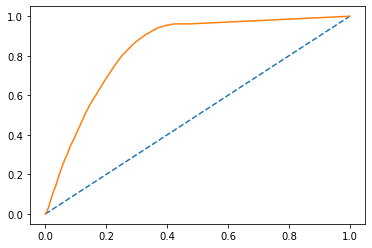

In [209]:
y_prob_te1 = dt_t.predict_proba(xtest)[:,1]
auc_te1 = roc_auc_score(ytest,y_prob_te1)
fpr_te1, tpr_te1, thr_te1 = roc_curve(ytest,y_prob_te1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_te1,tpr_te1)
print('AUC',auc_te1)
plt.show()

In [210]:
optimal_tr1 = np.argmax(tpr_tr1 - fpr_tr1)
optimal_thresh_tr1 = thr_tr1[optimal_tr1]
print('Best threshold train:',optimal_thresh_tr1)

Best threshold train: 0.12418300653594772


In [211]:
optimal_te1 = np.argmax(tpr_te1 - fpr_te1)
optimal_thresh_te1 = thr_te1[optimal_te1]
print('Best threshold test:',optimal_thresh_te1)

Best threshold test: 0.1


In [212]:
y_train_pr1 = []
for i in range(0,len(y_prob_tr1)):
    if np.array(y_prob_tr1)[i] > 0.124:
        a=1
    else:
        a=0
    y_train_pr1.append(a)
y_test_pr1 = []
for i in range(0,len(y_prob_te1)):
    if np.array(y_prob_te1)[i]> 0.1:
        a=1
    else:
        a=0
    y_test_pr1.append(a)

In [238]:
print('Threshold tuned Decision Tree model:\n')
print(classification_report(ytest, y_test_pr1))
print('Training Accuracy: ', round(dt_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(dt_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain,y_train_pr1),4),'\tTesting Precision:',round(precision_score(ytest,y_test_pr1),4))
print('Training Recall:   ', round(recall_score(ytrain,y_train_pr1),4),'\tTesting Recall:   ',round(recall_score(ytest,y_test_pr1),4))

Threshold tuned Decision Tree model:

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    100195
           1       0.28      0.91      0.43     14138

    accuracy                           0.70    114333
   macro avg       0.63      0.79      0.61    114333
weighted avg       0.89      0.70      0.75    114333

Training Accuracy:  0.8831 	Testing Accuracy:  0.872
Training Precision: 0.2959 	Testing Precision: 0.2798
Training Recall:    0.9447 	Testing Recall:    0.9066


In [254]:
round(f1_score(ytrain,y_train_pr1),4)

0.4506

In [255]:
round(f1_score(ytest,y_test_pr1),4)

0.4276

### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [360]:
from sklearn.metrics import classification_report, accuracy_score
rf= RandomForestClassifier()
rf= rf.fit(xtrain,ytrain)
y_pred_rf = rf.predict(Xtest)
print(classification_report(Ytest, y_pred_rf))
print('Training Accuracy', rf.score(xtrain,ytrain),'\tTesting Accuracy', rf.score(Xtest,Ytest))
print('Training Precision', precision_score(ytrain,rf.predict(xtrain)),'\tTesting Precision',precision_score(Ytest,y_pred_rf))
print('Training Recall', recall_score(ytrain,rf.predict(xtrain)),'\tTesting Recall',recall_score(Ytest,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92    100512
           1       0.32      0.22      0.26     13821

    accuracy                           0.85    114333
   macro avg       0.61      0.58      0.59    114333
weighted avg       0.83      0.85      0.84    114333

Training Accuracy 0.9838478723723273 	Testing Accuracy 0.8476205469986793
Training Precision 0.9789837098612322 	Testing Precision 0.31603147031776846
Training Recall 0.8880476755146097 	Testing Recall 0.2237898849576731


In [85]:
from sklearn.model_selection import RandomizedSearchCV
g= {'criterion':['entropy','gini'],
   'max_depth': [5,6,7,8,9,10],
                     'min_samples_split': [3,4,5,6,7,8,9],
                     'n_estimators':[200,300]}
gs= RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions=g,
                      n_iter=10,
                      scoring=precision_score,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Decision Tree Classifier:  {'n_estimators': 300, 'min_samples_split': 8, 'max_depth': 5, 'criterion': 'gini'} 



In [242]:
rf_t = RandomForestClassifier(n_estimators=300, min_samples_split=8, max_depth=10,criterion='entropy')
rf_t = rf_t.fit(xtrain,ytrain)
y_pred_rf_t = rf_t.predict(xtest)
print('Tuned Random Forest Model:\n')
print(classification_report(ytest, y_pred_rf_t))
print('Training Accuracy: ', round(rf_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(rf_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain, rf_t.predict(xtrain)),4),'\tTesting Precision:',round(precision_score(ytest,y_pred_rf_t),4))
print('Training Recall:   ', round(recall_score(ytrain,rf_t.predict(xtrain)),4),'\tTesting Recall:   ',round(recall_score(ytest,y_pred_rf_t),4))

Tuned Random Forest Model:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.65      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.76      0.50      0.47    114333
weighted avg       0.85      0.88      0.82    114333

Training Accuracy:  0.8781 	Testing Accuracy:  0.8764
Training Precision: 0.8824 	Testing Precision: 0.65
Training Recall:    0.0014 	Testing Recall:    0.0009


AUC: 0.8587849864240441


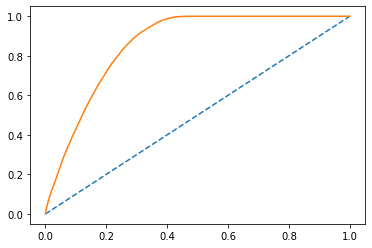

In [95]:
y_prob_tr2 = rf_t.predict_proba(xtrain)[:,1]
auc_tr2 = roc_auc_score(ytrain,y_prob_tr2)
fpr_tr2 , tpr_tr2, thr_tr2 = roc_curve(ytrain,y_prob_tr2)
print('AUC:',auc_tr2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tr2,tpr_tr2)
plt.show()

AUC 0.8560676489164138


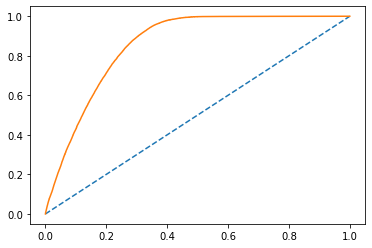

In [97]:
y_prob_te2 = rf_t.predict_proba(xtest)[:,1]
auc_te2 = roc_auc_score(ytest,y_prob_te2)
fpr_te2, tpr_te2, thr_te2 = roc_curve(ytest,y_prob_te2)
print('AUC',auc_te2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_te2, tpr_te2)
plt.show()

In [101]:
optimal_tr2 = np.argmax(tpr_tr2 - fpr_tr2)
optimal_thresh_tr2 = thr_tr2[optimal_tr2]
print('Best threshold train:',optimal_thresh_tr2)
optimal_te2 = np.argmax(tpr_te2 - fpr_te2)
optimal_thresh_te2 = thr_te2[optimal_te2]
print('Best threshold test:',optimal_thresh_te2)

Best threshold train: 0.15269835682614047
Best threshold test: 0.12544696477451953


In [106]:
# Training prediction
y_train_pr2 = []
for i in range(0,len(y_prob_tr2)):
    if np.array(y_prob_tr2)[i] > 0.12:
        a=1
    else:
        a=0
    y_train_pr2.append(a)
# Testing prediction
y_test_pr2 = []
for i in range(0,len(y_prob_te2)):
    if np.array(y_prob_te2)[i]> 0.12:
        b=1
    else:
        b=0
    y_test_pr2.append(b)

In [243]:
print('Threshold Tuned Random Forest Model:\n')
print(classification_report(ytest, y_test_pr2))
print('Training Accuracy: ', round(rf_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(rf_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain,y_train_pr2),4),'\tTesting Precision:',round(precision_score(ytest,y_test_pr2),4))
print('Training Recall:   ', round(recall_score(ytrain,y_train_pr2),4),'\tTesting Recall:   ',round(recall_score(ytest,y_test_pr2),4))

Threshold Tuned Random Forest Model:

              precision    recall  f1-score   support

           0       0.99      0.65      0.79    100195
           1       0.28      0.94      0.43     14138

    accuracy                           0.69    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.69      0.74    114333

Training Accuracy:  0.8781 	Testing Accuracy:  0.8764
Training Precision: 0.2748 	Testing Precision: 0.2778
Training Recall:    0.9508 	Testing Recall:    0.945


In [256]:
round(f1_score(ytrain,y_train_pr2),4)

0.4264

In [257]:
round(f1_score(ytest,y_test_pr2),4)

0.4294

### Ada Boost

In [108]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier()
adb= adb.fit(xtrain,ytrain)
y_pred_adb= adb.predict(xtest)
print(classification_report(ytest,y_pred_adb))
print('Training Accuracy', adb.score(xtrain,ytrain),'\tTesting Accuracy', adb.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,adb.predict(xtrain)),'\tTesting Precision',precision_score(ytest,y_pred_adb))
print('Training Recall', recall_score(ytrain,adb.predict(xtrain)),'\tTesting Recall',recall_score(ytest,y_pred_adb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.33      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.60      0.50      0.47    114333
weighted avg       0.81      0.88      0.82    114333

Training Accuracy 0.8778825681470597 	Testing Accuracy 0.876326170047143
Training Precision 0.3333333333333333 	Testing Precision 0.3333333333333333
Training Recall 0.00018420729460886652 	Testing Recall 0.00014146272457207527


In [109]:
from sklearn.model_selection import RandomizedSearchCV
g= { 'n_estimators':[100,150,200,250,300]}
gs= RandomizedSearchCV(AdaBoostClassifier(),
                      param_distributions=g,
                      n_iter=10,
                      scoring=precision_score,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for Decision Tree Classifier:  {'n_estimators': 100} 



In [244]:
from sklearn.ensemble import AdaBoostClassifier
adb_t= AdaBoostClassifier(n_estimators=100)
adb_t= adb_t.fit(xtrain,ytrain)
y_pred_adb_t= adb_t.predict(xtest)
print('Ada Boost model Tuned:\n')
print(classification_report(ytest,y_pred_adb_t))
print('Training Accuracy: ', round(adb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(adb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain, adb_t.predict(xtrain)),4),'\tTesting Precision:',round(precision_score(ytest,y_pred_adb_t),4))
print('Training Recall:   ', round(recall_score(ytrain,adb_t.predict(xtrain)),4),'\tTesting Recall:   ',round(recall_score(ytest,y_pred_adb_t),4))

Ada Boost model Tuned:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.44      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.66      0.50      0.47    114333
weighted avg       0.82      0.88      0.82    114333

Training Accuracy:  0.8779 	Testing Accuracy:  0.8763
Training Precision: 0.3902 	Testing Precision: 0.4444
Training Recall:    0.0005 	Testing Recall:    0.0003


AUC: 0.8516094904592769


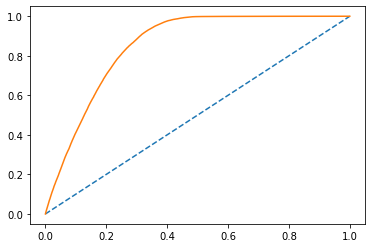

In [113]:
y_prob_tr3 = adb_t.predict_proba(xtrain)[:,1]
auc_tr3 = roc_auc_score(ytrain,y_prob_tr3)
fpr_tr3 , tpr_tr3, thr_tr3 = roc_curve(ytrain,y_prob_tr3)
print('AUC:',auc_tr3)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tr3,tpr_tr3)
plt.show()

AUC: 0.8530337051548462


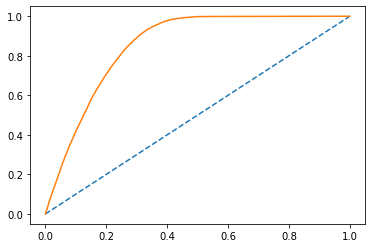

In [116]:
y_prob_te3 = adb_t.predict_proba(xtest)[:,1]
auc_te3 = roc_auc_score(ytest,y_prob_te3)
fpr_te3 , tpr_te3, thr_te3 = roc_curve(ytest,y_prob_te3)
print('AUC:',auc_te3)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_te3,tpr_te3)
plt.show()

In [117]:
optimal_tr3 = np.argmax(tpr_tr3 - fpr_tr3)
optimal_thresh_tr3 = thr_tr3[optimal_tr3]
print('Best threshold train:',optimal_thresh_tr3)
optimal_te3 = np.argmax(tpr_te3 - fpr_te3)
optimal_thresh_te3 = thr_te3[optimal_te3]
print('Best threshold test:',optimal_thresh_te3)

Best threshold train: 0.4949775852569134
Best threshold test: 0.4949562711556532


In [118]:
y_train_pr3 = []
for i in range(0,len(y_prob_tr3)):
    if np.array(y_prob_tr3)[i] > 0.49:
        a=1
    else:
        a=0
    y_train_pr3.append(a)
# Testing prediction
y_test_pr3 = []
for i in range(0,len(y_prob_te3)):
    if np.array(y_prob_te3)[i]> 0.49:
        b=1
    else:
        b=0
    y_test_pr3.append(b)

In [245]:
print('Ada Boost model Threshold Tuned:\n')
print(classification_report(ytest, y_test_pr3))
print('Training Accuracy: ', round(adb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(adb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain,y_train_pr3),4),'\tTesting Precision:',round(precision_score(ytest,y_test_pr3),4))
print('Training Recall:   ', round(recall_score(ytrain,y_train_pr3),4),'\tTesting Recall:   ',round(recall_score(ytest,y_test_pr3),4))

Ada Boost model Threshold Tuned:

              precision    recall  f1-score   support

           0       1.00      0.54      0.70    100195
           1       0.24      0.99      0.38     14138

    accuracy                           0.60    114333
   macro avg       0.62      0.77      0.54    114333
weighted avg       0.90      0.60      0.66    114333

Training Accuracy:  0.8779 	Testing Accuracy:  0.8763
Training Precision: 0.2323 	Testing Precision: 0.2352
Training Recall:    0.9933 	Testing Recall:    0.9929


In [258]:
round(f1_score(ytrain,y_train_pr3),4)

0.3766

In [259]:
round(f1_score(ytest,y_test_pr3),4)

0.3803

### Gradient boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb= gb.fit(xtrain,ytrain)
y_pred_gb= gb.predict(xtest)
print(classification_report(ytest,y_pred_gb))
print('Training Accuracy', gb.score(xtrain,ytrain),'\tTesting Accuracy', gb.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,gb.predict(xtrain)),'\tTesting Precision',precision_score(ytest,y_pred_gb))
print('Training Recall', recall_score(ytrain,gb.predict(xtrain)),'\tTesting Recall',recall_score(ytest,y_pred_gb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.67      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.77      0.50      0.47    114333
weighted avg       0.85      0.88      0.82    114333

Training Accuracy 0.8779238012414909 	Testing Accuracy 0.8763611555718821
Training Precision 0.631578947368421 	Testing Precision 0.6666666666666666
Training Recall 0.00036841458921773305 	Testing Recall 0.00028292544914415053


In [122]:
from sklearn.model_selection import RandomizedSearchCV
g= {'n_estimators':[100,150,200,250,300],
   'min_samples_split': [3,4,5,6,7],
   'max_depth': [5,6,7,8,9,10],
   'min_samples_leaf': [4,5,6,7,8,9]}
gs= RandomizedSearchCV(GradientBoostingClassifier(),
                      param_distributions=g,
                      n_iter=10,
                      scoring=precision_score,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Decision Tree Classifier:  {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 10} 



In [246]:
gb_t = GradientBoostingClassifier(n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_depth=10)
gb_t = gb_t.fit(xtrain,ytrain)
y_pred_gb_t = gb_t.predict(xtest)
print('Gradient Boost Model Tuned:\n')
print(classification_report(ytest,y_pred_gb_t))
print('Training Accuracy: ', round(gb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(gb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain, gb_t.predict(xtrain)),4),'\tTesting Precision:',round(precision_score(ytest,y_pred_gb_t),4))
print('Training Recall:   ', round(recall_score(ytrain,gb_t.predict(xtrain)),4),'\tTesting Recall:   ',round(recall_score(ytest,y_pred_gb_t),4))

Gradient Boost Model Tuned:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93    100195
           1       0.42      0.04      0.08     14138

    accuracy                           0.87    114333
   macro avg       0.65      0.52      0.51    114333
weighted avg       0.82      0.87      0.83    114333

Training Accuracy:  0.893 	Testing Accuracy:  0.8742
Training Precision: 0.9186 	Testing Precision: 0.4171
Training Recall:    0.1352 	Testing Recall:    0.0429


AUC: 0.917384018209601


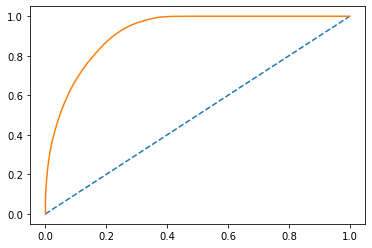

In [180]:
y_prob_tr4 = gb_t.predict_proba(xtrain)[:,1]
auc_tr4 = roc_auc_score(ytrain,y_prob_tr4)
fpr_tr4 , tpr_tr4, thr_tr4 = roc_curve(ytrain,y_prob_tr4)
print('AUC:',auc_tr4)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tr4,tpr_tr4)
plt.show()

AUC: 0.850307895854322


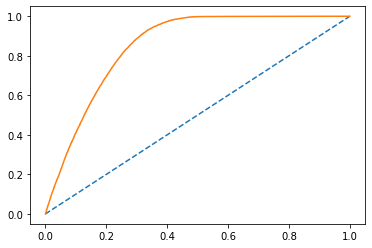

In [181]:
y_prob_te4 = gb_t.predict_proba(xtest)[:,1]
auc_te4 = roc_auc_score(ytest,y_prob_te4)
fpr_te4 , tpr_te4, thr_te4 = roc_curve(ytest,y_prob_te4)
print('AUC:',auc_te4)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_te4,tpr_te4)
plt.show()

In [182]:
optimal_tr4 = np.argmax(tpr_tr4 - fpr_tr4)
optimal_thresh_tr4 = thr_tr4[optimal_tr4]
print('Best threshold train:',optimal_thresh_tr4)
optimal_te4 = np.argmax(tpr_te4 - fpr_te4)
optimal_thresh_te4 = thr_te4[optimal_te4]
print('Best threshold test:',optimal_thresh_te4)

Best threshold train: 0.1785760867396351
Best threshold test: 0.1031864315031592


In [130]:
y_train_pr4 = []
for i in range(0,len(y_prob_tr4)):
    if np.array(y_prob_tr4)[i] > 0.18:
        a=1
    else:
        a=0
    y_train_pr4.append(a)
# Testing prediction
y_test_pr4 = []
for i in range(0,len(y_prob_te4)):
    if np.array(y_prob_te4)[i]> 0.10:
        b=1
    else:
        b=0
    y_test_pr4.append(b)

In [178]:
print(classification_report(ytest, y_test_pr4))
print('Training Accuracy', gb_t.score(xtrain,ytrain),'\tTesting Accuracy', gb_t.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,y_train_pr4),'\tTesting Precision',precision_score(ytest,y_test_pr4))
print('Training Recall', recall_score(ytrain,y_train_pr4),'\tTesting Recall',recall_score(ytest,y_test_pr4))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100195
           1       0.28      0.93      0.43     14138

    accuracy                           0.69    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.69      0.75    114333

Training Accuracy 0.891901820253696 	Testing Accuracy 0.8743844734241207
Training Precision 0.3438599296450272 	Testing Precision 0.2793329236506961
Training Recall 0.9243215031315241 	Testing Recall 0.932380817654548


In [183]:
y_pb_gm_tr = gb_t.predict_proba(xtrain)[:,1]
y_pb_gm_te = gb_t.predict_proba(xtest)[:,1]
gmeans_tr = np.argmax(np.sqrt(tpr_tr4 * (1-fpr_tr4)))
opt_thresh_tr = thr_tr4[gmeans_tr]
print('Best train threshold', opt_thresh_tr)
gmeans_te = np.argmax(np.sqrt(tpr_te4 * (1-fpr_te4)))
opt_thresh_te = thr_te4[gmeans_te]
print('Best test threshold', opt_thresh_te)

Best train threshold 0.19908592037214923
Best test threshold 0.12472935295933217


In [184]:
y_train_gm1 = []
for i in range(0,len(y_pb_gm_tr)):
    if np.array(y_pb_gm_tr)[i] > 0.12:
        a=1
    else:
        a=0
    y_train_gm1.append(a)
# Testing prediction
y_test_gm1 = []
for i in range(0,len(y_pb_gm_te)):
    if np.array(y_pb_gm_te)[i]> 0.12:
        b=1
    else:
        b=0
    y_test_gm1.append(b)

In [247]:
print('Gradient Boost model Threshold Tuned:\n')
print(classification_report(ytest, y_test_gm1))
print('Training Accuracy: ', round(adb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(adb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain,y_train_gm1),4),'\tTesting Precision:',round(precision_score(ytest,y_test_gm1),4))
print('Training Recall:   ', round(recall_score(ytrain,y_train_gm1),4),'\tTesting Recall:   ',round(recall_score(ytest,y_test_gm1),4))

Gradient Boost model Threshold Tuned:

              precision    recall  f1-score   support

           0       0.98      0.68      0.81    100195
           1       0.29      0.91      0.44     14138

    accuracy                           0.71    114333
   macro avg       0.63      0.80      0.62    114333
weighted avg       0.90      0.71      0.76    114333

Training Accuracy:  0.8779 	Testing Accuracy:  0.8763
Training Precision: 0.3042 	Testing Precision: 0.288
Training Recall:    0.9705 	Testing Recall:    0.9079


In [262]:
round(f1_score(ytrain,y_train_gm1),4)

0.4632

In [263]:
round(f1_score(ytest,y_test_gm1),4)

0.4373

### XG Boost

In [133]:
!pip3 install xgboost
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb= xgb.fit(xtrain,ytrain)
y_pred_xgb= xgb.predict(xtest)
print(classification_report(ytest,y_pred_xgb))
print('Training Accuracy', xgb.score(xtrain,ytrain),'\tTesting Accuracy', xgb.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,xgb.predict(xtrain)),'\tTesting Precision',precision_score(ytest,y_pred_xgb))
print('Training Recall', recall_score(ytrain,xgb.predict(xtrain)),'\tTesting Recall',recall_score(ytest,y_pred_xgb))

[01:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.47      0.02      0.03     14138

    accuracy                           0.88    114333
   macro avg       0.67      0.51      0.48    114333
weighted avg       0.83      0.88      0.82    114333

Training Accuracy 0.8802253576033826 	Testing Accuracy 0.8760987641363386
Training Precision 0.7647562018819504 	Testing Precision 0.4715447154471545
Training Recall 0.02744688689672111 	Testing Recall 0.01640967605036073


In [137]:
from sklearn.model_selection import RandomizedSearchCV
g= {'n_estimators':[100,150,200,250,300],
   'max_depth': [5,6,7,8,9,10],
   }
gs= RandomizedSearchCV(XGBClassifier(),
                      param_distributions=g,
                      n_iter=10,
                      scoring=precision_score,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[14:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters for Decision Tree Classifier:  {'n_estimators': 200, 'max_depth': 8} 



In [248]:
xgb_t= XGBClassifier(n_estimators=200,max_depth=8)
xgb_t= xgb_t.fit(xtrain,ytrain)
y_pred_xgb_t= xgb_t.predict(xtest)
print('XGB Classifier Model Tuned:\n')
print(classification_report(ytest,y_pred_xgb_t))
print('Training Accuracy: ', round(xgb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(xgb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain, xgb_t.predict(xtrain)),4),'\tTesting Precision:',round(precision_score(ytest,y_pred_xgb_t),4))
print('Training Recall:   ', round(recall_score(ytrain,xgb_t.predict(xtrain)),4),'\tTesting Recall:   ',round(recall_score(ytest,y_pred_xgb_t),4))

[23:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier Model Tuned:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93    100195
           1       0.44      0.05      0.09     14138

    accuracy                           0.87    114333
   macro avg       0.66      0.52      0.51    114333
weighted avg       0.83      0.87      0.83    114333

Training Accuracy:  0.8894 	Testing Accuracy:  0.8746
Training Precision: 0.8579 	Testing Precision: 0.4359
Training Recall:    0.1127 	Testing Recall:    0.0491


AUC: 0.9062002656664275


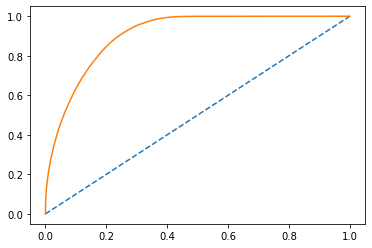

In [139]:
y_prob_tr5 = xgb_t.predict_proba(xtrain)[:,1]
auc_tr5 = roc_auc_score(ytrain,y_prob_tr5)
fpr_tr5 , tpr_tr5, thr_tr5 = roc_curve(ytrain,y_prob_tr5)
print('AUC:',auc_tr5)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tr5,tpr_tr5)
plt.show()

AUC: 0.8490415178589613


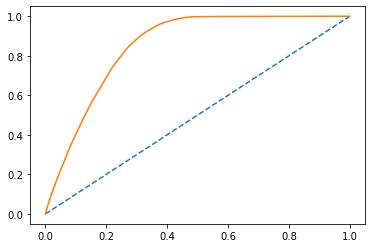

In [140]:
y_prob_te5 = xgb_t.predict_proba(xtest)[:,1]
auc_te5 = roc_auc_score(ytest,y_prob_te5)
fpr_te5 , tpr_te5, thr_te5 = roc_curve(ytest,y_prob_te5)
print('AUC:',auc_te5)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_te5,tpr_te5)
plt.show()

In [142]:
optimal_tr5 = np.argmax(tpr_tr5 - fpr_tr5)
optimal_thresh_tr5 = thr_tr5[optimal_tr5]
print('Best threshold train:',optimal_thresh_tr5)
optimal_te5 = np.argmax(tpr_te5 - fpr_te5)
optimal_thresh_te5 = thr_te5[optimal_te5]
print('Best threshold test:',optimal_thresh_te5)

Best threshold train: 0.18129331
Best threshold test: 0.108759984


In [144]:
y_train_pr5 = []
for i in range(0,len(y_prob_tr5)):
    if np.array(y_prob_tr5)[i] > 0.18:
        a=1
    else:
        a=0
    y_train_pr5.append(a)
# Testing prediction
y_test_pr5 = []
for i in range(0,len(y_prob_te5)):
    if np.array(y_prob_te5)[i]> 0.11:
        b=1
    else:
        b=0
    y_test_pr5.append(b)

In [146]:
print(classification_report(ytest, y_test_pr5))
print('Training Accuracy', xgb_t.score(xtrain,ytrain),'\tTesting Accuracy', xgb_t.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,y_train_pr5),'\tTesting Precision',precision_score(ytest,y_test_pr5))
print('Training Recall', recall_score(ytrain,y_train_pr5),'\tTesting Recall',recall_score(ytest,y_test_pr5))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    100195
           1       0.28      0.92      0.43     14138

    accuracy                           0.70    114333
   macro avg       0.63      0.79      0.62    114333
weighted avg       0.90      0.70      0.75    114333

Training Accuracy 0.8893828530302575 	Testing Accuracy 0.8745594010478165
Training Precision 0.33743367376048383 	Testing Precision 0.2836742739498007
Training Recall 0.9078656514797986 	Testing Recall 0.9161126043287594


In [187]:
y_pb_gm_tr2 = xgb_t.predict_proba(xtrain)[:,1]
y_pb_gm_te2 = xgb_t.predict_proba(xtest)[:,1]
gmeans_tr2 = np.argmax(np.sqrt(tpr_tr5 * (1-fpr_tr5)))
opt_thresh_tr2 = thr_tr5[gmeans_tr2]
print('Best train threshold', opt_thresh_tr2)
gmeans_te2 = np.argmax(np.sqrt(tpr_te5 * (1-fpr_te5)))
opt_thresh_te2 = thr_te5[gmeans_te2]
print('Best test threshold', opt_thresh_te2)

Best train threshold 0.19457932
Best test threshold 0.1340839


In [190]:
y_train_gm2 = []
for i in range(0,len(y_pb_gm_tr)):
    if np.array(y_pb_gm_tr)[i] > 0.13:
        a=1
    else:
        a=0
    y_train_gm2.append(a)
# Testing prediction
y_test_gm2 = []
for i in range(0,len(y_pb_gm_te)):
    if np.array(y_pb_gm_te)[i]> 0.13:
        b=1
    else:
        b=0
    y_test_gm2.append(b)

In [249]:
print('XGBoost classifier Model Threshold Tuned:\n')
print(classification_report(ytest, y_test_gm2))
print('Training Accuracy: ', round(adb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(adb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain,y_train_gm2),4),'\tTesting Precision:',round(precision_score(ytest,y_test_gm2),4))
print('Training Recall:   ', round(recall_score(ytrain,y_train_gm2),4),'\tTesting Recall:   ',round(recall_score(ytest,y_test_gm2),4))

XGBoost classifier Model Threshold Tuned:

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    100195
           1       0.29      0.89      0.44     14138

    accuracy                           0.72    114333
   macro avg       0.64      0.79      0.63    114333
weighted avg       0.89      0.72      0.77    114333

Training Accuracy:  0.8779 	Testing Accuracy:  0.8763
Training Precision: 0.3111 	Testing Precision: 0.292
Training Recall:    0.964 	Testing Recall:    0.894


In [264]:
round(f1_score(ytrain,y_train_gm2),4)

0.4704

In [265]:
round(f1_score(ytest,y_test_gm2),4)

0.4402

### Cat Boost

In [147]:
from catboost import CatBoostClassifier

In [156]:
cb= CatBoostClassifier(silent=True)
cb= cb.fit(xtrain,ytrain)
y_pred_cb= cb.predict(xtest)
print(classification_report(ytest,y_pred_cb))
print('Training Accuracy', cb.score(xtrain,ytrain),'\tTesting Accuracy', cb.score(xtest,ytest))
print('Training Precision', precision_score(ytrain,cb.predict(xtrain)),'\tTesting Precision',precision_score(ytest,y_pred_cb))
print('Training Recall', recall_score(ytrain,cb.predict(xtrain)),'\tTesting Recall',recall_score(ytest,y_pred_cb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.47      0.02      0.04     14138

    accuracy                           0.88    114333
   macro avg       0.68      0.51      0.49    114333
weighted avg       0.83      0.88      0.82    114333

Training Accuracy 0.8804052838336283 	Testing Accuracy 0.8760375394680451
Training Precision 0.7072715972653822 	Testing Precision 0.4745269286754003
Training Recall 0.03493798354414835 	Testing Recall 0.023058424105248266


In [159]:
from sklearn.model_selection import RandomizedSearchCV
g= {'depth': [8,10,18,20,24,30],
    'iterations': [10, 20,30,40,50,60,70,80,90, 100]
    }
gs= RandomizedSearchCV(CatBoostClassifier(),
                      param_distributions=g,
                      n_iter=10,
                      scoring=precision_score,
                      cv=3,
                      n_jobs=-1,
                      verbose=False)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Learning rate set to 0.5
0:	learn: 0.4493847	total: 80.7ms	remaining: 3.15s
1:	learn: 0.3607499	total: 156ms	remaining: 2.96s
2:	learn: 0.3183556	total: 285ms	remaining: 3.51s
3:	learn: 0.2960278	total: 405ms	remaining: 3.65s
4:	learn: 0.2834921	total: 540ms	remaining: 3.78s
5:	learn: 0.2760353	total: 770ms	remaining: 4.36s
6:	learn: 0.2716609	total: 937ms	remaining: 4.42s
7:	learn: 0.2690409	total: 1.07s	remaining: 4.29s
8:	learn: 0.2674911	total: 1.2s	remaining: 4.12s
9:	learn: 0.2664251	total: 1.32s	remaining: 3.96s
10:	learn: 0.2661172	total: 1.44s	remaining: 3.79s
11:	learn: 0.2654576	total: 1.56s	remaining: 3.64s
12:	learn: 0.2651904	total: 1.68s	remaining: 3.5s
13:	learn: 0.2647773	total: 1.81s	remaining: 3.37s
14:	learn: 0.2644978	total: 1.94s	remaining: 3.23s
15:	learn: 0.2642955	total: 2.06s	remaining: 3.09s
16:	learn: 0.2640157	total: 2.19s	remaining: 2.96s
17:	learn: 0.2638688	total: 2.31s	remaining: 2.83s
18:	learn: 0.2637131	total: 2.43s	remaining: 2.69s
19:	learn: 0.2634

In [250]:
cb_t= CatBoostClassifier(silent=True, learning_rate=0.01, iterations=1000,depth=10)
cb_t= cb_t.fit(xtrain,ytrain)
y_pred_cb_t= cb_t.predict(xtest)
print('Cat Boost Classifier Tuned:\n')
print(classification_report(ytest,y_pred_cb_t))
print('Training Accuracy: ', round(cb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(cb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain, cb_t.predict(xtrain)),4),'\tTesting Precision:',round(precision_score(ytest,y_pred_cb_t),4))
print('Training Recall:   ', round(recall_score(ytrain,cb_t.predict(xtrain)),4),'\tTesting Recall:   ',round(recall_score(ytest,y_pred_cb_t),4))

Cat Boost Classifier Tuned:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.53      0.01      0.03     14138

    accuracy                           0.88    114333
   macro avg       0.70      0.51      0.48    114333
weighted avg       0.83      0.88      0.82    114333

Training Accuracy:  0.8788 	Testing Accuracy:  0.8765
Training Precision: 0.6624 	Testing Precision: 0.5306
Training Recall:    0.0157 	Testing Recall:    0.0135


AUC: 0.8624849903638002


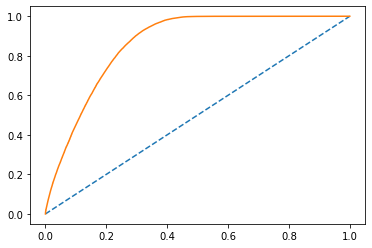

In [192]:
y_prob_tr6 = cb_t.predict_proba(xtrain)[:,1]
auc_tr6 = roc_auc_score(ytrain,y_prob_tr6)
fpr_tr6 , tpr_tr6, thr_tr6 = roc_curve(ytrain,y_prob_tr6)
print('AUC:',auc_tr6)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_tr6,tpr_tr6)
plt.show()

AUC: 0.8490415178589613


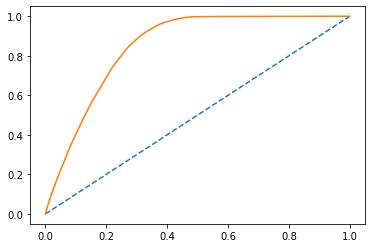

In [193]:
y_prob_te6 = xgb_t.predict_proba(xtest)[:,1]
auc_te6 = roc_auc_score(ytest,y_prob_te6)
fpr_te6 , tpr_te6, thr_te6 = roc_curve(ytest,y_prob_te6)
print('AUC:',auc_te6)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_te6,tpr_te6)
plt.show()

In [194]:
optimal_tr6 = np.argmax(tpr_tr6 - fpr_tr6)
optimal_thresh_tr6 = thr_tr6[optimal_tr6]
print('Best threshold train:',optimal_thresh_tr6)
optimal_te6 = np.argmax(tpr_te6 - fpr_te6)
optimal_thresh_te6 = thr_te6[optimal_te6]
print('Best threshold test:',optimal_thresh_te6)

Best threshold train: 0.12984092031381214
Best threshold test: 0.108759984


In [195]:
y_train_pr6 = []
for i in range(0,len(y_prob_tr6)):
    if np.array(y_prob_tr6)[i] > 0.12:
        a=1
    else:
        a=0
    y_train_pr6.append(a)
# Testing prediction
y_test_pr6 = []
for i in range(0,len(y_prob_te6)):
    if np.array(y_prob_te6)[i]> 0.12:
        b=1
    else:
        b=0
    y_test_pr6.append(b)

In [251]:
print('Cat Boost Classifier Threshold Tuned:\n')
print(classification_report(ytest, y_test_pr6))
print('Training Accuracy: ', round(cb_t.score(xtrain,ytrain),4),'\tTesting Accuracy: ',round(cb_t.score(xtest,ytest),4))
print('Training Precision:', round(precision_score(ytrain,y_train_pr6),4),'\tTesting Precision:',round(precision_score(ytest,y_test_pr6),4))
print('Training Recall:   ', round(recall_score(ytrain,y_train_pr6),4),'\tTesting Recall:   ',round(recall_score(ytest,y_test_pr6),4))

Cat Boost Classifier Threshold Tuned:

              precision    recall  f1-score   support

           0       0.98      0.68      0.81    100195
           1       0.29      0.91      0.44     14138

    accuracy                           0.71    114333
   macro avg       0.63      0.79      0.62    114333
weighted avg       0.90      0.71      0.76    114333

Training Accuracy:  0.8788 	Testing Accuracy:  0.8765
Training Precision: 0.2819 	Testing Precision: 0.2879
Training Recall:    0.938 	Testing Recall:    0.905


In [266]:
round(f1_score(ytrain,y_train_pr6),4)

0.4336

In [267]:
round(f1_score(ytest,y_test_pr6),4)

0.4369

In [269]:
# Feature importance
feat_imp = pd.DataFrame(columns={'Features':X.columns,'Importance':xgb_t.feature_importances_})

In [270]:
feat_imp

,Features,Importance


In [281]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': cb_t.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False, inplace=True)
important_features

,Features,Importance
7,Previously_Insured_1,40.293586
1,Age,12.912167
4,Annual_Premium,10.788138
3,Vehicle_Damage,9.790258
2,Region_Code,9.312014
5,Policy_Sales_Channel,9.145200
0,Gender,5.688304
8,New_vehicles,1.619840
9,Old_vehicles,0.321769
6,Driving_License_1,0.128724


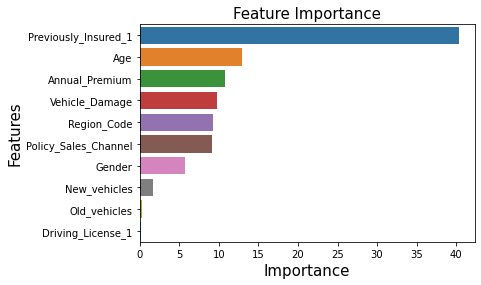

In [282]:
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()